# Machine Learning Project 2019
## Author; Shane Canny
## Project Title; Analysis of the Boston House Price Data Set

## Introduction. ##

The following report documents the analysis of the 2019 Machine Learning module project. The project requirements are broken into three sections:

**1.0** **Describe;** Use descriptive statistics and plots to describe the Boston House Prices dataset.<br>
**2.0** **Infer;** Use inferential statistics to analyse whether there is a signiﬁcant diﬀerence in median house prices between houses that are along the Charles river and those that aren’t.<br>
**3.0** **Predict;** Use keras to create a neural network that can predict the median house price based on the other variables in the dataset. 

**Pre-requistes**

A number of pre-requistes have to be completed prior to formally conducting analysis on the Boston House Price Data Set. These pre-requistes can be broken down into the following requirements:

1. Import Python Libraries / Packages that maybe required during the analysis of the data set.
2. Importing the data set from sklearn library.
3. Once the data set is imported, listing the data set to understand what is inlcuded in the raw data.

Once the pre-requistes have been met organising the data into a format that can be used to output descriptive statistics and allow inferences to be made can be undertake.

**Pre-Requiste 1**

The first pre-requiste is to import the required python packages to conduct analysis on the Boston House Price data set. The line items below list the python libraries imported to allow analysis of the data set.

In [2]:
## Importing the required libraries for required for later analysis##
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm
import seaborn as sns
import keras as ks
from keras.models import Sequential
from statsmodels.graphics.gofplots import qqplot
import sklearn.preprocessing as pre
import sklearn.model_selection as mod
import statistics
import sklearn.decomposition as PCA
from keras.optimizers import SGD

Using TensorFlow backend.


**Pre-Requiste 2**

The second pre-requiste is met with the following line items of code. The Boston House Price data set is imported from sklearn as load_boston and renamed as "boston" for future analysis.

To visualise what the data set is made up of, variables were set against the dictionary keys and the variables where printed. 

In [4]:
## Importing the data set from the internal sklearn library within Pythion ##

from sklearn.datasets import load_boston
boston = load_boston()

In [5]:
## As the file is a dictionary, printing the dictionary keys ##
x=boston.keys()
print (x)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


**Pre-Requiste 3**

The third and final pre-requiste is contained within the following lines. The pre-requistes data preparation step is to allow the author to understand what the data set is made up of and also the basis for creating dataframes that can be edited, graphed and manipulated for the purposes of data analysis.

In [6]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
## For later manipluation creating a pandas dataframe of the data set, setting the variable as house ##
house = pd.DataFrame(boston.data)

In [9]:
## Setting each column to its correct designation ##
house.columns=boston.feature_names

In [10]:
## Adding the 14th Column i.e. target to Price
house['PRICE'] = boston.target

In [11]:
## Creating a new DataFrame of the original house price ##
Original_House_Price=house['PRICE']

## Renaming Columns Names for Clarity ##
Original_House_Price.columns = ['Combined Price of Houses']

In [12]:
## Exporting the dataframe to an external location as a .csv file
export_csv=house.to_csv(r'C:\Users\Shane\Desktop\2019 Projects\Machine Learning\bostonhouse.csv')

**1.0** **Describe**

The first part of the machine learning project is to use descriptive statistics to describe the Boston House Price data set. Below the "describe" command is used to provide a simple break down of the primary hands on statistics in relation to the Boston House Price data set.

A fundamental process in trying to understand what the data implies is using visual aids such as graphs and plots to help hypothesis relationships within the data set. 

In [13]:
## List Descriptive Statistics of the dataframe ##
house.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


C:\Users\Shane\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Shane\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


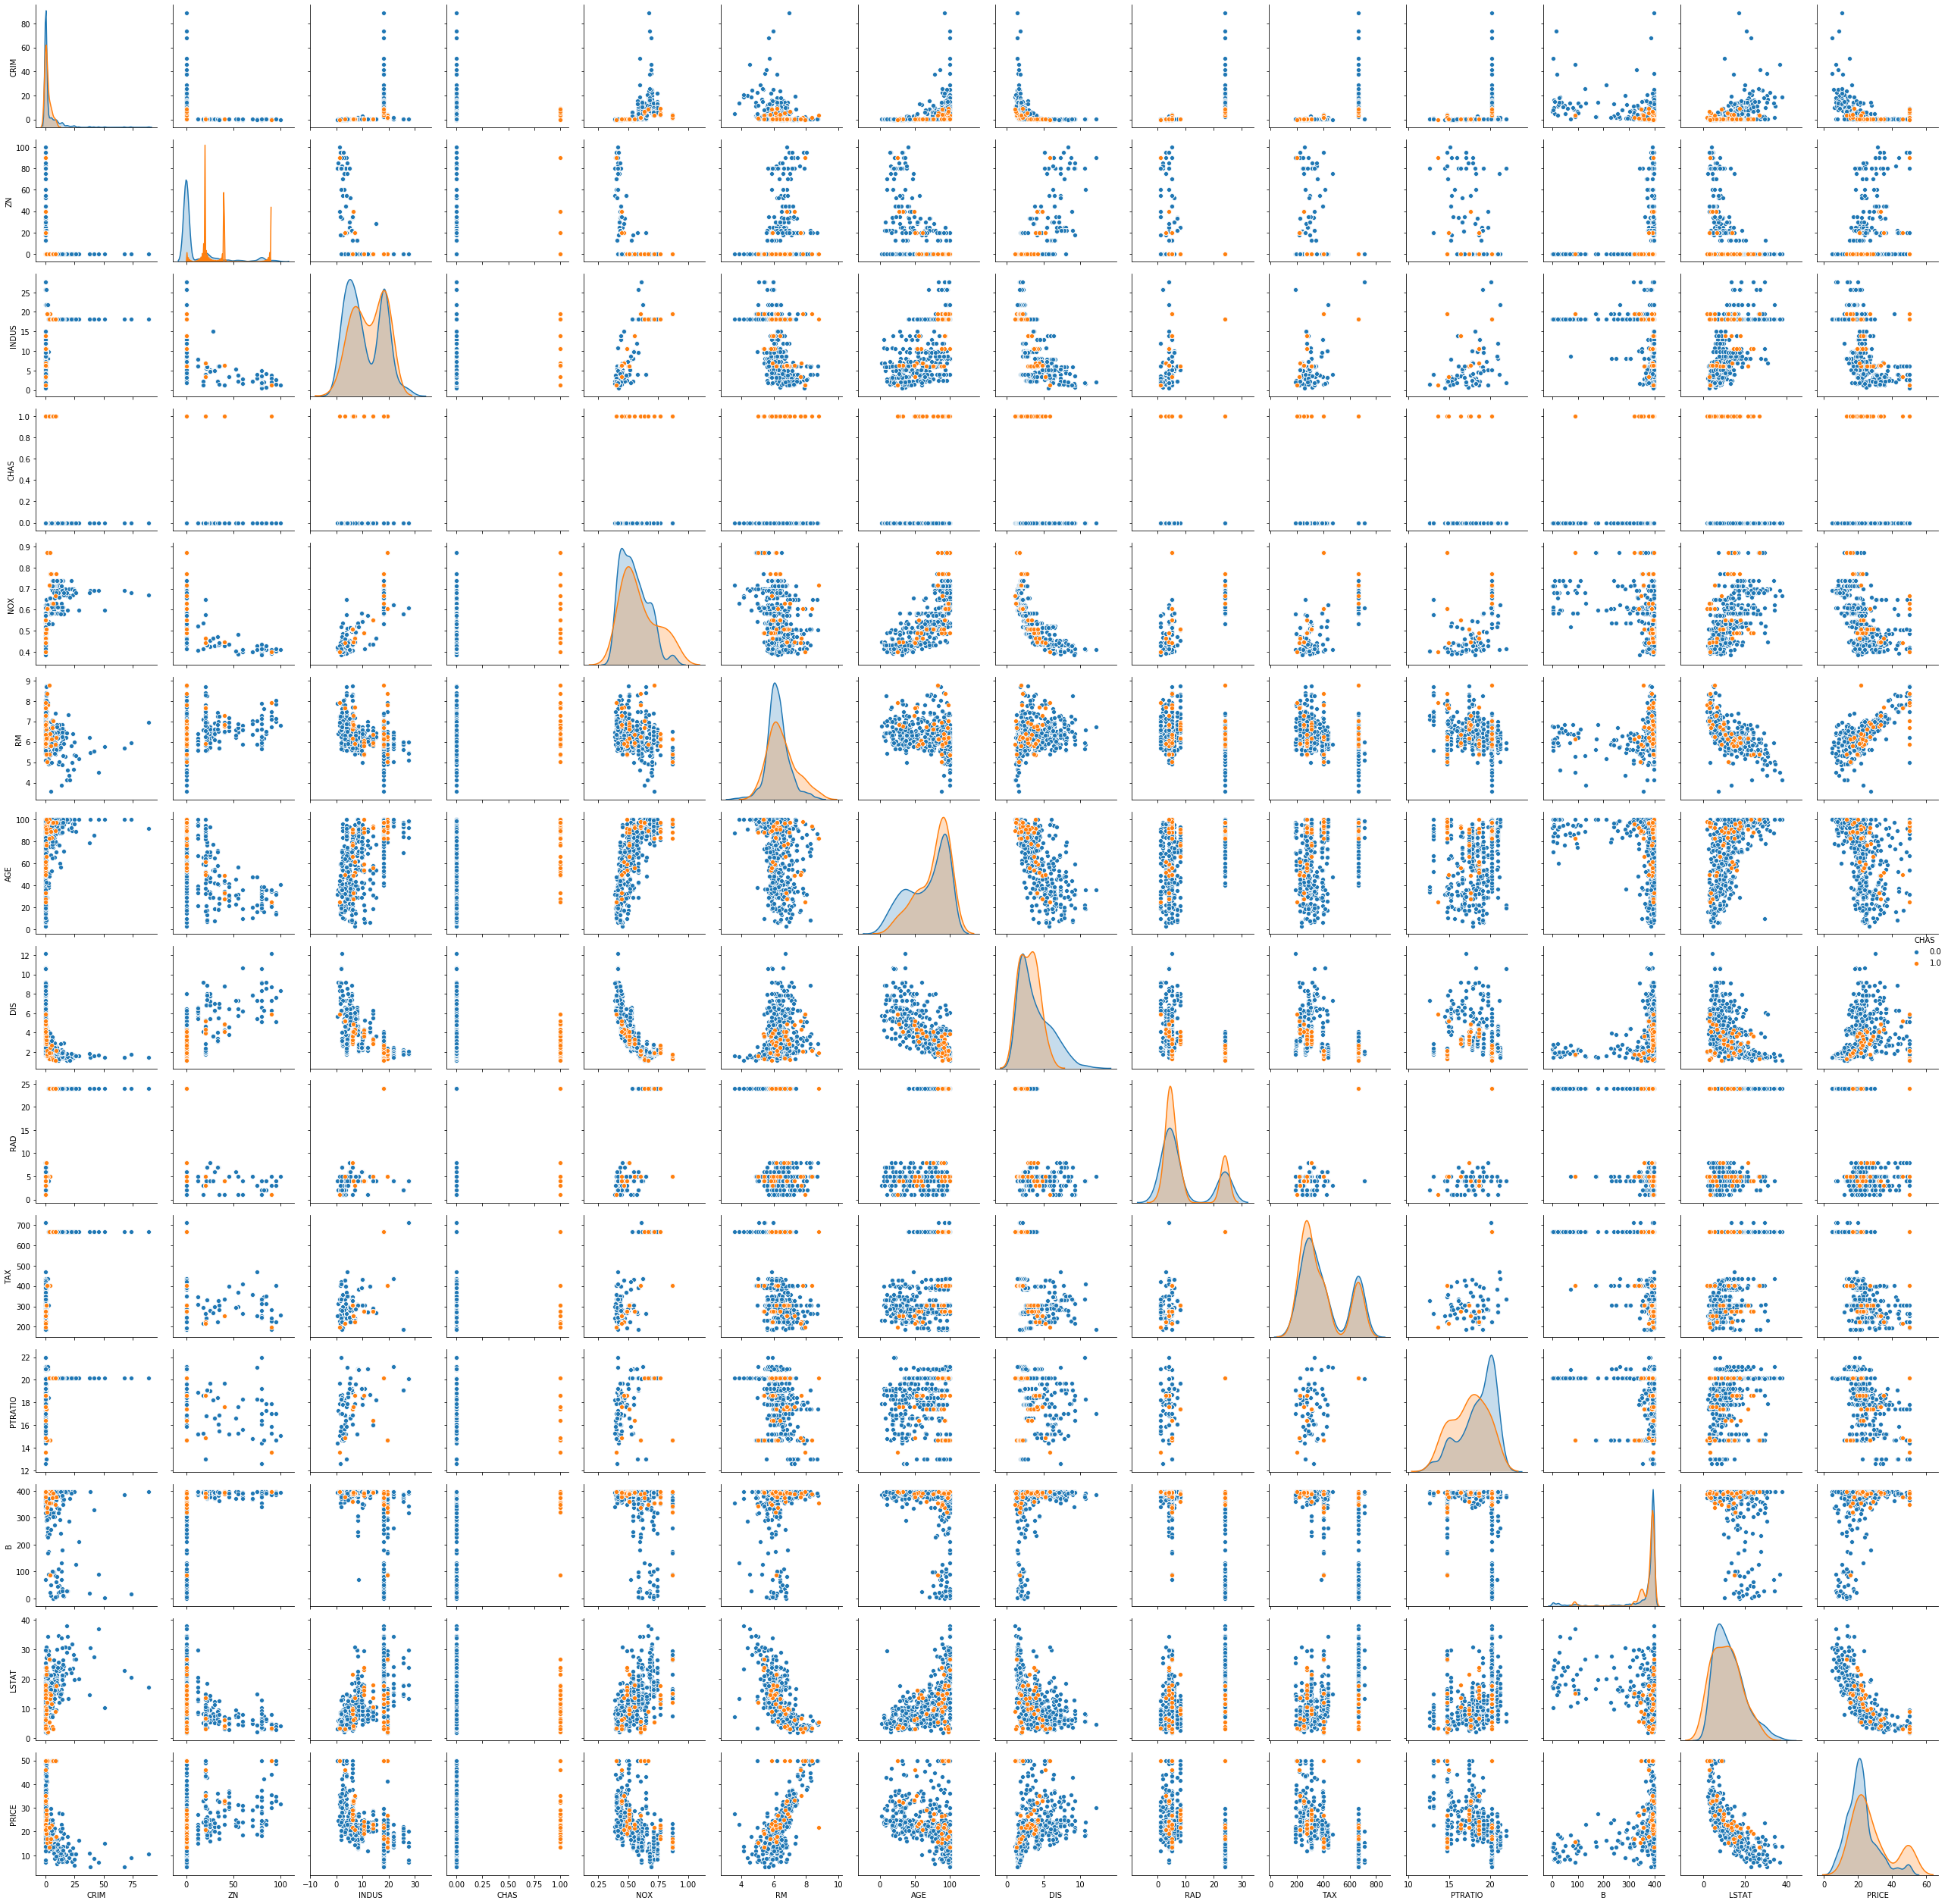

In [12]:
##Creating a Pair Plot for all the house data and using hue coloring for the variable CHAS to identigy graphs that could potential show relationship with location along the river ## ##
sns.pairplot(house, hue = 'CHAS', height=2.5)
plt.tight_layout()

The pair plot above can be overwhelming with information. But for the purposes of this analysis and with a critical eye to the inferal section of this project we can focus in on the "CHAS" title along the x-axis. Using the "hue" in conjunction with CHAS it has allowed the differentiation of the Charles River dummy variable i.e. (Orange = 1 if track bounds river; Blue = 0 otherwise). From this we can plot in greater detail data sets that may have a dependency on each other. Using the pair plot graph we can break down the data into manageable dataframes to do more guided and specific data analysis.

**2.0** **Infer**

Below I have detailed the descriptive statistics for house prices not along the Charles river and the descriptive statistics for house prices that track along the river. These statistics are useful for a general overview of the data but a legitimate statistical analysis of whether the price of houses along the river Charles compared to houses not along the river cannot be made.

To determine if there is a statistical difference between house prices along and away from the river Charles the following will be completed as part of the Infer section of this project;

1. Two data sets will be created, one for house price along the river and the second for house pricess not along the river.
2. Boxplots of the data to make a visual compariso of the datas shape.
3. Q-Q plots of the data set to determine if the data sets follow the normal distribution.
4. Confirmatio through the execution of the Anderson Darling Normality test to verify if the data follows the Normal distribution.
5. A Levenes or Bartlett's test depending on the datas distribution to determine the datas variances.
6. A t-test (student if data sets are Normally distributed or Welsh's test if the data sets do not follow a Normal distribution.


An acronym for completing such analysis is "PAR";

Where;
    "P" stands for Planning & Execution
    "A" stands for Analysis & Results
    "R" Recommendations & Conclusions


**Planning & Execution**

As outlined above the data will be broken into different dataframes so visual verification of the data can be conducted.

In [13]:
## Creating a new DataFrame for the price of houses ##
river_house_price = pd.DataFrame(house, columns = ['CHAS', 'PRICE'])  

In [14]:

## Creating a dataframe of house and prices that are not along the river ##
house_away_from_river=river_house_price[river_house_price.CHAS == 0]

## Renaming Columns Names for Clarity ##
house_away_from_river.columns = ['CHAS', 'Price of House Not Along River']

## Listing Summary Statistics for Price of House ot along the river ##
house_away_from_river.describe()


,CHAS,Price of House Not Along River
count,471.0,471.000000
mean,0.0,22.093843
std,0.0,8.831362
min,0.0,5.000000
25%,0.0,16.600000
50%,0.0,20.900000
75%,0.0,24.800000
max,0.0,50.000000


In [15]:
## Creating a dataframe of houses and prices that are along the river ##
house_along_river=river_house_price[river_house_price.CHAS == 1]

## Renaming Columns Names for Clarity ##
house_along_river.columns = ['CHAS', 'Price of House Along River']

## Listing Summary Statistics for Price of Houses along the river ##
house_along_river.describe()

,CHAS,Price of House Along River
count,35.0,35.000000
mean,1.0,28.440000
std,0.0,11.816643
min,1.0,13.400000
25%,1.0,21.100000
50%,1.0,23.300000
75%,1.0,33.150000
max,1.0,50.000000


In [16]:
## Creating a new table of Price of Housing ##
Price_of_Housing = pd.concat([house_away_from_river,house_along_river,Original_House_Price], axis=1)
Price_of_Housing.describe()

,CHAS,Price of House Not Along River,CHAS,Price of House Along River,PRICE
count,471.0,471.000000,35.0,35.000000,506.000000
mean,0.0,22.093843,1.0,28.440000,22.532806
std,0.0,8.831362,0.0,11.816643,9.197104
min,0.0,5.000000,1.0,13.400000,5.000000
25%,0.0,16.600000,1.0,21.100000,17.025000
50%,0.0,20.900000,1.0,23.300000,21.200000
75%,0.0,24.800000,1.0,33.150000,25.000000
max,0.0,50.000000,1.0,50.000000,50.000000


Below the box plot details a standardized way of displaying the distribution of the data for the house prices based on the “minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum” values within the data set.

The box plot should only be used for visual comparison and no statistical inferences should be made. It is a useful graphical summary to compare the spread of the data sets.

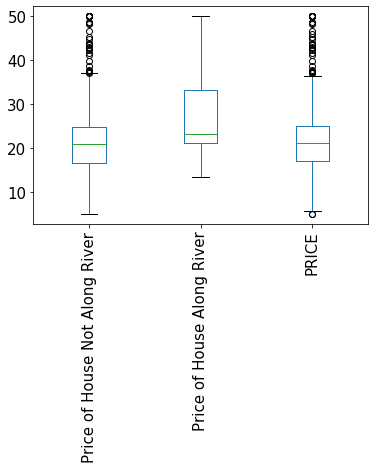

In [17]:
## Creating a BoxPlot of the House prices to visual observe the data ##

boxplot = Price_of_Housing.boxplot(column=['Price of House Not Along River', 'Price of House Along River', 'PRICE'],grid=False, rot=90, fontsize=15)


In [18]:
## Setting x as the value of all the House Prices from the Original Data ##
x = Price_of_Housing.loc[:, 'PRICE']

In [19]:
## Setting y as the Price of Houses Along the River ##

y=house_away_from_river.loc[:,'Price of House Not Along River']

In [20]:
## Setting z as the Price of Houses Along the River ##

z=house_along_river.loc[:,'Price of House Along River']

The quantile-quantile (q-q) plot is a graphical technique for determining if two data sets come from populations with a common distribution.

A q-q plot is a plot of the quantiles of the first data set against the quantiles of the second data set. By a quantile, we mean the fraction (or percent) of points below the given value. That is, the 0.3 (or 30%) quantile is the point at which 30% percent of the data fall below and 70% fall above that value.

A 45-degree reference line is also plotted. If the two sets come from a population with the same distribution, the points should fall approximately along this reference line. The greater the departure from this reference line, the greater the evidence for the conclusion that the two data sets have come from populations with different distributions. (source: https://www.itl.nist.gov/div898/handbook/eda/section3/qqplot.htm)

The q-q plots below are used to determine if the house prices follow the Normal Distribution i.e. the sample data follows the blue dots while the theoretial Normal distribution follows the red reference line. If the sample data was Normally distributed the blue dots of the sample data would approximately fall along the red Normally ditributed reference line. As the points for all datas sets do not fall along this reference line it can be assumed the sample data points do not follow the normal distribution. This will be confirmed or rejected with further analysis.

In statistical analysis, all parametric tests assume the data follow certain characteristics, known as assumptions.  Deviations and unknown violations of these assumptions can impact the validity of the conclusions drawn for the statistical analysis. For a number of tests that perform stastical analysis on the difference between two data sets such as the "student t-test", assume the sample data follows the Normal distribution. If the test is performed on data that does not follow the required assumptions incorrect conclusions can and will be made. 

<function matplotlib.pyplot.show(*args, **kw)>

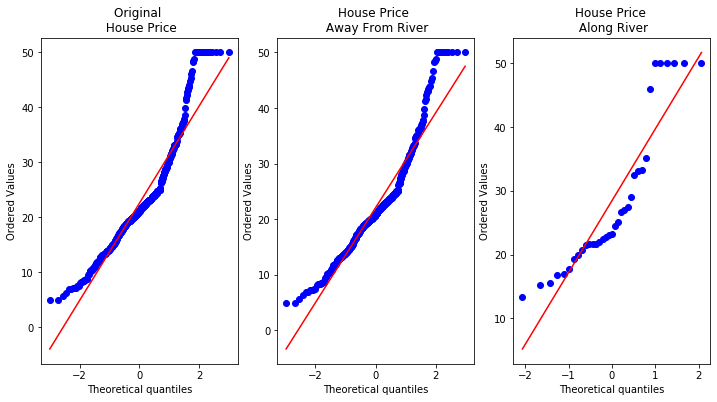

In [21]:
## Creating Quantile Plots ## 
fig= plt.figure(figsize=(12,6))

plt.subplot(1,3,1)

stats.probplot(x, dist="norm", plot=plt)
plt.title('Original \n House Price')
plt.subplot(1,3,2)
stats.probplot(y, dist="norm", plot=plt)
plt.title('House Price \n Away From River')
plt.subplot(1,3,3)
stats.probplot(z, dist="norm", plot=plt)
plt.title('House Price \n Along River')

plt.show

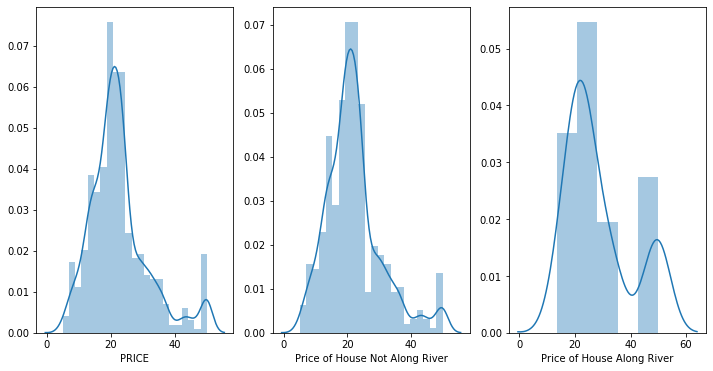

In [22]:
## Creating Distribution Sub Plots of the 3 Sets of Data ##

fig= plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
sns.distplot(x)

plt.subplot(1,3,2)
sns.distplot(y)

plt.subplot(1,3,3)
sns.distplot(z)

plt.show()


The q-q plots and histogram plots with overlaid distributions above indicate none of the data sets follow the Normal distribution. These assumptions will determine the correct statistical tests to perfrom on our data to determine variances and differences in the MEAN/MEDIAN.

To formally determine whether the data sets follow the normal distribution an Anderson Darling Normality tests was conducted on the data sets.

In [23]:
## Checking for Normality Using the Anderson Darling Test for the Original House Prices i.e. Along and Not Along the River ##
anderson_results_x = stats.anderson(x, dist='norm')
print(anderson_results_x)

AndersonResult(statistic=11.822483502722775, critical_values=array([0.572, 0.651, 0.781, 0.911, 1.084]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [24]:
## Checking for Normality Using the Anderson Darling Test for House Prices not along the river i.e. CHAS O, so the data can be graphed ## 
anderson_results_y = stats.anderson(y, dist='norm')
print(anderson_results_y)

AndersonResult(statistic=9.101545026305189, critical_values=array([0.571, 0.651, 0.78 , 0.91 , 1.083]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [25]:
## Checking for Normality Using the Anderson Darling Test for House Prices along the river i.e. CHAS 1, so the data can be graphed ##
anderson_results_z = stats.anderson(z, dist='norm')
print(anderson_results_z)

AndersonResult(statistic=2.2267097760261905, critical_values=array([0.527, 0.6  , 0.719, 0.839, 0.998]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))





As the results above confirm none, of the data sets i.e. House Prices Along the River, House Prices Not Along the River and the combined original results do not follow the Normal distribution. 

As none of the critical values for the significance levels (2.5 two-tailed, 5 one sided) exceed the AD (Anderson Darling) crtical statistic we can reject the Null Hypothesis that the data sets follow the Normal distribution.

As the data sets do not follow the Normal distribution we can now rule using;

- Bartletts Test (to calculate the variance between two sets of sample data)
- 2-Sample t Test (to calculate whether there is a significant statistical difference between the data sets)

We can also determine the best approach for analysising the date is to perform;

- Levenes Test (to calculate the variance between the price of houses along the river and price of houses away from the river.
- Welsh's Test (to calculate if there is a significant statistical difference between the price of houses along the river and price of houses away from the river. 

In [26]:
## Performing Levenes Test to determine equal variance ##
stats.levene(y,z)

LeveneResult(statistic=4.590342218715871, pvalue=0.03263097600633006)


**NULL Hypothesis (H0):** There is no significant difference between the variances of the data <br>
**Alternative Hypothesis (H1):** There is a significant difference between the variances of the data sets

Ho = v1=v2 

H1 = v1 > v2 or v1 < v2 or v1 $\neq$ v2


As can be seen from the Levene Results above as the p-value is below the set confidence requirement of 95% (0.05) we can reject the NULL Hypothesis and that there is a significant statistical difference between the variances of the price of houses along the river and price of houses away from the river.

In [27]:
## Performing a t Test on the Price of Houses Along the River to House Prices not along the River, as Levenes Variance test details the variances are equal. ##

stats.ttest_ind(y, z, equal_var = False)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

**NULL Hypothesis (H0):** There is no significant difference between the MEDIAN of the data sets <br>
**Alternative Hypothesis (H1):** There is a significant difference between the MEDIAN of the data sets

Ho = u1=u2 

H1 = u1 > u2 or v1 < u2 or u1 $\neq$ u2

The Ttest performed on the the price of houses along the river and price of houses away from the river determines there is not enough evidence to FAIL to Reject the NULL hypothesis and as the p-value is below the set confidence requirement of 95% (0.05) we can reject the NULL Hypothesis and determine there is a statistical difference between the price of houses along the river and price of houses away from the river.

In [28]:
The_MEDIAN_Price_of_House_Not_Along_the_River = statistics.median(y)
print("The MEDIAN Price of Housing Not Along the River Charles", The_MEDIAN_Price_of_House_Not_Along_the_River)
The_MEDIAN_Price_of_House_Along_the_River = statistics.median(z)
print("The MEDIAN Price of Housing Along the River Charles", The_MEDIAN_Price_of_House_Along_the_River)

The MEDIAN Price of Housing Not Along the River Charles 20.9
The MEDIAN Price of Housing Along the River Charles 23.3


**Conclusion**

As has been concluded through the statistical analysis above there is a significant statistical difference between the price of housing along the River Charles in Boston compared to house prices not along the river. 



**3.0** **Predict**

The following section is the final part of the machine learning module project for 2019. The objective of this section is to create a neural network that takes all the variables within the Boston House Data set and to see if the neural network can predict the value of the housing based of these inputs.

A number of aspects impact the function of a neural network and one of these is whether there is a linear, quadratic or any other relationship ship between the neural networks inputs and outputs.

I have broken this sections into 3 different neural networks;

1. The first neural network looks at specific inputs from the data set which may have a some level of a linear relationship with price of housing by visual inspection of a scatter plot with the price plotted against all other inputs.
2. The second neural network looks at all inputs in the data set against the output of price. This neural network utilises the activisation as "linear" and the optimizer as "ADAM".
3. The third neural network examines all inputs in the data set against the output of price. This neural network utilises the activisation as "relu" and the optimizer as "ADAM". This neural network also implements data whitening to try and optimise the predicted results.

<Figure size 864x432 with 0 Axes>

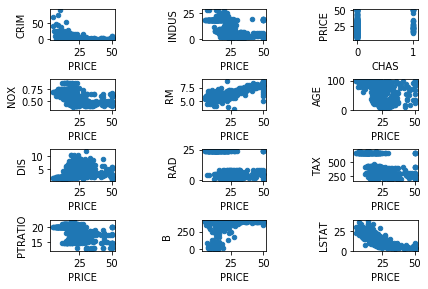

In [29]:
## Creating Subplots of Price vrs all out Column Variables ##

fig= plt.figure(figsize=(12,6))
fig, axes = plt.subplots(nrows=4, ncols=3)

house.plot(ax=axes[0,0],kind='scatter',x='PRICE',y='CRIM')
house.plot(ax=axes[0,1],kind='scatter',x='PRICE',y='INDUS')
house.plot(ax=axes[0,2],kind='scatter',x='CHAS',y='PRICE')
house.plot(ax=axes[1,0],kind='scatter',x='PRICE',y='NOX')
house.plot(ax=axes[1,1],kind='scatter',x='PRICE',y='RM')
house.plot(ax=axes[1,2],kind='scatter',x='PRICE',y='AGE')
house.plot(ax=axes[2,0],kind='scatter',x='PRICE',y='DIS')
house.plot(ax=axes[2,1],kind='scatter',x='PRICE',y='RAD')
house.plot(ax=axes[2,2],kind='scatter',x='PRICE',y='TAX')
house.plot(ax=axes[3,0],kind='scatter',x='PRICE',y='PTRATIO')
house.plot(ax=axes[3,1],kind='scatter',x='PRICE',y='B')
house.plot(ax=axes[3,2],kind='scatter',x='PRICE',y='LSTAT')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=1.25,wspace=1.35)

In [156]:
##First Neural Network ##
## Setting my inputs ans outputs for the neural network##
inputs = house[['B','DIS', 'RM', 'CRIM','CHAS']]
outputs = house[['PRICE']]

In [157]:
## Creating a Neural Network ##

m=ks.models.Sequential()
m.add(ks.layers.Dense(10,input_dim=5, activation='linear'))
m.add(ks.layers.Dense(10, activation='linear'))
m.add(ks.layers.Dense(1, activation='linear'))

In [158]:
m.compile(loss='mean_squared_error',optimizer='Adam')

In [162]:
## Training the Neural Network ##

m.fit(inputs,outputs,epochs=10,batch_size=11)

Epoch 1/10
506/506 [==============================] - 0s 140us/step - loss: 82.3668
Epoch 2/10
506/506 [==============================] - 0s 134us/step - loss: 81.2098
Epoch 3/10
506/506 [==============================] - 0s 154us/step - loss: 81.2432
Epoch 4/10
506/506 [==============================] - 0s 158us/step - loss: 82.5954
Epoch 5/10
506/506 [==============================] - 0s 168us/step - loss: 80.6654
Epoch 6/10
506/506 [==============================] - 0s 152us/step - loss: 80.2980
Epoch 7/10
506/506 [==============================] - 0s 146us/step - loss: 80.5176
Epoch 8/10
506/506 [==============================] - 0s 150us/step - loss: 79.6860
Epoch 9/10
506/506 [==============================] - 0s 148us/step - loss: 77.9023
Epoch 10/10
506/506 [==============================] - 0s 156us/step - loss: 80.2585


In [163]:
m.predict(inputs)

array([[23.871426  ],
       [24.401466  ],
       [24.056305  ],
       [24.817799  ],
       [24.915016  ],
       [24.880886  ],
       [24.73325   ],
       [24.999352  ],
       [24.593163  ],
       [24.83667   ],
       [24.948452  ],
       [25.187641  ],
       [24.409554  ],
       [24.271816  ],
       [23.180569  ],
       [24.099457  ],
       [23.563866  ],
       [23.434963  ],
       [17.894993  ],
       [23.445583  ],
       [22.635609  ],
       [23.60741   ],
       [23.763435  ],
       [23.777393  ],
       [23.945915  ],
       [19.040028  ],
       [23.177956  ],
       [19.119411  ],
       [23.53429   ],
       [22.937504  ],
       [21.976784  ],
       [22.772877  ],
       [14.784744  ],
       [21.642216  ],
       [15.468582  ],
       [23.546642  ],
       [22.508755  ],
       [23.890415  ],
       [23.62281   ],
       [24.55503   ],
       [24.485386  ],
       [24.142967  ],
       [24.125961  ],
       [24.725262  ],
       [24.473507  ],
       [24

**First Neural Network**<br>
The first neural network examined the specific inputs of;

- CRIM
- INDU
- NOX
- RM
- AGE
- DIS
- RAD
- TAX
- PTRATIO
- B
- LSTAT

against the PRICE output and predicted prices based off the predicted effects the inputs could have.


**Loss Function**<br>
The loss function used for this neural network was the Mean Squared Error (MSE) loss function. The MSE function tells you how close a regression line is to a set of points.This is performed by taking the distances from the points to the regression line (i.e. the errors) and squaring them. By squaring the errors you remove the possibility for negative signs and gives more weight to larger differences. These results are then averaged to give you the mean.<br>

This loss function was selected for this project as it is a good fit for data sets that show potential for linear relationships as well as reducing the opportunity for negative predicted values i.e. (it is rare you would be paying someone to take your house)

**Activation Function**<br>
The main purpose of an activation function in a neural network is to convert a input signal of a node to an output signal. That output signal used as a input in the next layer in the neural network. In this first neural network a Linear activation function was used. 

**Optimizer**<br>
The optimizer minimises or maximise the error function (Mean Squared Error in this case) used in computing the target values(Y, Price) from the set of predictors(X, our 13 inputs) used in the neural network model. The optimizer can have a large effect on the predicted results sounderstanding which one is right for your model or trial different optimizers is an important step in developing your neural network. A number of optimizers were trialled from SDG, NAG, AdaGrad, to AdaDelta but the ADAM optimizer through trial and error produced the most accurate loss'.

**Epochs**<br>
An epoch is one forward pass and one backward pass of all the training examples.For this neural network the epoch was set at 10.
 
**Batch Size** <br>
The batch size is equal to the number of training examples in one forward/backward pass, for this model the batch size was set at 11.


In [176]:
## Creating a list for the Price column in the house DataFrame ##
j= house["PRICE"].tolist()

In [177]:
## Changing the Price column in the house DataFrame to an array from a list ##
s=np.asarray(j)

In [178]:
Predicted_Price_One=m.predict(inputs)

In [179]:
data = [Predicted_Price_One,s]

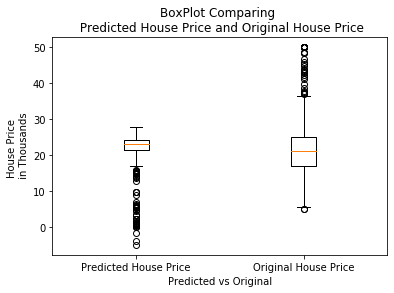

In [180]:
## Creating a Boxplot for the Predicted House Prices and the Original House Prices ##

data = [Predicted_Price_One.flatten(), s.flatten()] 
fig, ax = plt.subplots()
ax.boxplot(data)
plt.xticks([1, 2], ['Predicted House Price', 'Original House Price'])
plt.xlabel('Predicted vs Original')
plt.ylabel('House Price \n in Thousands')
plt.title('BoxPlot Comparing \n Predicted House Price and Original House Price')

plt.show()

In [188]:
## Calculating the Median Price of the Predict House Values##
np.median(Predicted_Price_One)

23.008068

In [189]:
## Calculating the Median Price of the Original House Values##
np.median(s)

21.2

**Results of First Neural Network**

As can be seen from the first execution of the first neural network the Predicted House Prices Median value(23.008068) is not too far away from the Original House Price Median value of (21.2). If you look at the boxplot for the model you can see clearly the model is not a good one as the spread of data of the predicted values is very different to the original data set.  

**Second Neural Network**<br>

The second neural network examined all 13 inputs within the Boston House Price Data set to predict the price of housing;

- CRIM
- ZN
- INDUS
- CHAS
- NOX
- RM
- AGE
- DIS
- RAD
- TAX
- PTRATIO
- B
- LSTAT



**Loss Function**<br>
The loss function used for the second neural network was again the Mean Squared Error (MSE) loss function. 

**Activation Function**<br>
Linear activation function was again used. 

**Optimizer**<br>
The ADAM optimizer was utilised.

**Epochs**<br>
The number of epochs was set at 10.
 
**Batch Size** <br>
The batch size was set at 11.

In [190]:
##Second Neural Network ##
## Setting my inputs ans outputs for the neural network##
inputs = house[['CRIM', 'ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
outputs = house[['PRICE']]

In [191]:
## Creating a Neural Network ##

m=ks.models.Sequential()
m.add(ks.layers.Dense(10,input_dim=13, activation='linear'))
m.add(ks.layers.Dense(10, activation='linear'))
m.add(ks.layers.Dense(1, activation='linear'))

In [192]:
m.compile(loss='mean_squared_error',optimizer='adam')

In [193]:
inputs_train, inputs_test,outputs_train,outputs_test=mod.train_test_split(inputs,outputs,test_size=0.2)

In [194]:
## Training the Neural Network ##

m.fit(inputs,outputs,epochs=10,batch_size=11)

Epoch 1/10
506/506 [==============================] - 1s 2ms/step - loss: 141.3748
Epoch 2/10
506/506 [==============================] - 0s 296us/step - loss: 89.3647
Epoch 3/10
506/506 [==============================] - 0s 196us/step - loss: 82.2014
Epoch 4/10
506/506 [==============================] - 0s 198us/step - loss: 78.6648
Epoch 5/10
506/506 [==============================] - 0s 269us/step - loss: 74.4488
Epoch 6/10
506/506 [==============================] - 0s 204us/step - loss: 75.6030
Epoch 7/10
506/506 [==============================] - 0s 200us/step - loss: 69.4957
Epoch 8/10
506/506 [==============================] - 0s 190us/step - loss: 68.1878
Epoch 9/10
506/506 [==============================] - 0s 202us/step - loss: 73.9409
Epoch 10/10
506/506 [==============================] - 0s 255us/step - loss: 67.2465


In [195]:
m.predict(inputs)

array([[29.617994 ],
       [26.490526 ],
       [26.864721 ],
       [27.23702  ],
       [27.05388  ],
       [27.38267  ],
       [25.215689 ],
       [25.055208 ],
       [20.887457 ],
       [24.786695 ],
       [24.311705 ],
       [26.342001 ],
       [21.598948 ],
       [26.90291  ],
       [27.20114  ],
       [26.325941 ],
       [24.568964 ],
       [25.511877 ],
       [19.322828 ],
       [25.947577 ],
       [23.877302 ],
       [26.590014 ],
       [25.046232 ],
       [25.209486 ],
       [26.17726  ],
       [21.97465  ],
       [25.846052 ],
       [22.006071 ],
       [27.275427 ],
       [26.678232 ],
       [22.413832 ],
       [27.129477 ],
       [14.543942 ],
       [23.970419 ],
       [19.066912 ],
       [25.959848 ],
       [24.031672 ],
       [24.343779 ],
       [22.78224  ],
       [33.107784 ],
       [33.513474 ],
       [21.740004 ],
       [21.609    ],
       [21.399939 ],
       [23.015776 ],
       [22.465631 ],
       [20.911829 ],
       [23.13

In [196]:
Predicted_Price= m.predict(inputs)

In [199]:
## Printing the Predicted Median Price ##
np.median(Predicted_Price)

25.187405

In [200]:
## Creating a list for the Price column in the house DataFrame ##
k= house["PRICE"].tolist()

In [201]:
## Changing the Price column in the house DataFrame to an array from a list ##
r=np.asarray(k)

In [202]:
## Checking the Shape of the Array ##
r.shape

(506,)

Text(0.5, 1.0, 'Original House Price')

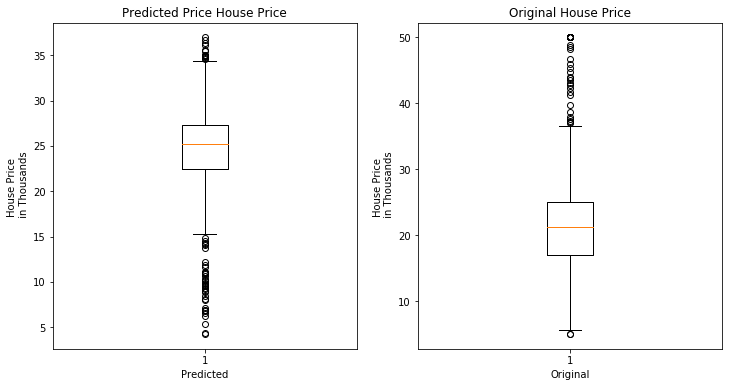

In [203]:
## Creating Boxplots of the Predicted Values and the Original House Price Values ##

fig = plt.figure(1, figsize=(12,6))
ax = fig.add_subplot(121)
ax.boxplot(Predicted_Price)
plt.xlabel('Predicted')
plt.ylabel('House Price \n in Thousands')
plt.title('Predicted Price House Price')
ax = fig.add_subplot(122)
ax.boxplot(r)
plt.xlabel('Original')
plt.ylabel('House Price \n in Thousands')
plt.title('Original House Price')


In [204]:
data = [Predicted_Price,r]

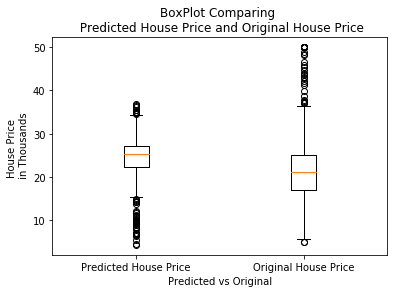

In [205]:
## Creating a Boxplot for the Predicted House Prices and the Original House Prices ##

data = [Predicted_Price.flatten(), r.flatten()] 
fig, ax = plt.subplots()
ax.boxplot(data)
plt.xticks([1, 2], ['Predicted House Price', 'Original House Price'])
plt.xlabel('Predicted vs Original')
plt.ylabel('House Price \n in Thousands')
plt.title('BoxPlot Comparing \n Predicted House Price and Original House Price')

plt.show()

**Results of the Second Neural Network**<br>

The second neural network predicted the House Price Median value as (25.187405) which is further away from the orignal datas median House Price value of (21.2). But this model had improved on the spread of the predicted house price data, meaning the extra variable inputs had an impact on the predicted house price. The third neural networks goal was to improve on this development by improving the relationship of the median values of both sets of data by reducing the variation in the predicted spread of the predicted data points.  

**Third Neural Network**<br>

The third neural network examined all 13 inputs within the Boston House Price Data set to predict the price of housing;

- CRIM
- ZN
- INDUS
- CHAS
- NOX
- RM
- AGE
- DIS
- RAD
- TAX
- PTRATIO
- B
- LSTAT

**Data Whitening**<br>
With the objective of improving the predicted median housing price, data whitening was implemented on the third neural network. Principal Components Analysis (PCA) was used as a data whitening tool. PCA is a dimensionality reduction algorithm that can be used to significantly speed up your unsupervised feature learning algorithm. For the purposes of this neural network it was used to tranform the data into a more suitable distribution (e.g. Normal) so data analysis could be carried out.

**Loss Function**<br>
The loss function used for the third neural network was again the Mean Squared Error (MSE) loss function. 

**Activation Function**<br>
The Rectified Linear Unit (relu) activation function was used. As the activation function is responsible for transforming the summed weighted input from the node into the activation of the node or output for that input, the relu activation function was used for the third neural network. As the relu function will output the input directly if is positive, otherwise, it will output zero it was decided it could be a potentially positive addition to the neural network instead of a Linear activation function. Due to the fact the third neural network had more than one layer the relu function was more suited to overcoming the vanishing gradient problem associated with certain types of neural networks.

**Optimizer**<br>
The ADAM optimizer was utilised.

**Epochs**<br>
The number of epochs was set at 10.
 
**Batch Size** <br>
Instead of batch size 80% of the original data was assigned to train the neural network while 20% (0.2) was used to make predictions.

In [35]:
##Third Neural Network ##
## Setting my inputs ans outputs for the neural network##
inputs = house[['CRIM', 'ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
outputs = house[['PRICE']]

In [36]:
## Whitening ##

pca=PCA.PCA(n_components=13, whiten=True)
pca.fit(inputs)
inputs=pd.DataFrame(pca.transform(inputs),columns=inputs.columns)
inputs

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.681737,-0.070328,-0.110906,0.324032,-0.257641,-1.195502,-0.257642,1.774739,-1.069788,-0.302890,0.749064,-0.290887,0.606963
1,-0.960939,0.127958,-1.076024,0.079408,0.052369,-0.613999,-0.156852,0.296642,0.258499,1.196095,0.096360,-0.386434,-0.599819
2,-0.963338,0.178102,-0.585647,-0.629399,-0.013232,-1.119363,0.428840,0.165237,0.229360,0.837983,-0.925444,-0.437518,-0.081586
3,-1.082361,0.231504,-0.228412,-1.202960,0.214394,-1.318206,-0.491872,0.274068,0.587810,0.887470,-0.546818,-0.214018,0.790989
4,-1.081808,0.203619,-0.459975,-0.868201,0.249464,-1.091127,-0.763402,0.334618,0.587477,1.033557,-1.065225,-0.225982,0.643021
5,-1.075078,0.236901,-0.576298,-0.694113,0.205287,-1.196537,-0.784717,0.364263,0.673839,1.176955,0.414446,-0.191945,0.432912
6,-0.593644,-0.110494,-0.258006,0.113139,-0.022475,0.178375,-0.353236,0.194789,-1.356128,1.726317,0.629017,-0.421871,-0.163596
7,-0.580889,-0.127854,-1.059722,1.282305,0.019102,0.694912,-1.165460,0.411314,-1.220748,2.635746,-0.297178,-0.446479,-0.626864
8,-0.560599,-0.003136,-1.189201,1.461642,0.339630,2.420868,-2.171006,0.515493,-1.585299,2.651310,-0.610550,-0.276093,-0.943811
9,-0.569145,-0.004018,-0.774196,0.876559,-0.004038,0.552682,-0.921533,0.366581,-1.168989,3.010844,0.123235,-0.401419,-0.293907


In [37]:
## Creating a Neural Network ##

m=ks.models.Sequential()
m.add(ks.layers.Dense(10,input_dim=13, activation='relu'))
m.add(ks.layers.Dense(10, activation='relu'))
m.add(ks.layers.Dense(10, activation='relu'))
m.add(ks.layers.Dense(1, activation='relu'))

In [38]:
m.compile(loss='mean_squared_error',optimizer='ADAM')

In [39]:
inputs_train, inputs_test,outputs_train,outputs_test=mod.train_test_split(inputs,outputs,test_size=0.2)

In [40]:
## Training the Neural Network ##
m.fit(inputs_train,outputs_train,epochs=15,batch_size=11)

Epoch 1/15
404/404 [==============================] - 0s 938us/step - loss: 595.6556
Epoch 2/15
404/404 [==============================] - 0s 200us/step - loss: 571.2527
Epoch 3/15
404/404 [==============================] - 0s 129us/step - loss: 525.6052
Epoch 4/15
404/404 [==============================] - 0s 121us/step - loss: 432.7954
Epoch 5/15
404/404 [==============================] - 0s 126us/step - loss: 273.5114
Epoch 6/15
404/404 [==============================] - 0s 124us/step - loss: 116.4360
Epoch 7/15
404/404 [==============================] - 0s 124us/step - loss: 51.6071
Epoch 8/15
404/404 [==============================] - 0s 121us/step - loss: 37.7491
Epoch 9/15
404/404 [==============================] - 0s 121us/step - loss: 30.8980
Epoch 10/15
404/404 [==============================] - 0s 124us/step - loss: 26.5978
Epoch 11/15
404/404 [==============================] - 0s 114us/step - loss: 23.8373
Epoch 12/15
404/404 [==============================] - 0s 126us/step

In [41]:
m.predict(inputs)

array([[25.804098 ],
       [19.980633 ],
       [26.569336 ],
       [25.836569 ],
       [25.99055  ],
       [21.0576   ],
       [19.79986  ],
       [19.982939 ],
       [17.755846 ],
       [20.355278 ],
       [19.627861 ],
       [20.93911  ],
       [20.756876 ],
       [18.097664 ],
       [17.064785 ],
       [17.731062 ],
       [19.719542 ],
       [15.218887 ],
       [13.335638 ],
       [15.933021 ],
       [10.547344 ],
       [15.758746 ],
       [14.540514 ],
       [12.765776 ],
       [14.651026 ],
       [ 9.221775 ],
       [13.896915 ],
       [10.474102 ],
       [17.97276  ],
       [18.93585  ],
       [10.307762 ],
       [15.522529 ],
       [13.197614 ],
       [11.211621 ],
       [11.284118 ],
       [20.153933 ],
       [19.1198   ],
       [20.867111 ],
       [23.703178 ],
       [30.806993 ],
       [35.217075 ],
       [28.122036 ],
       [24.73732  ],
       [25.301004 ],
       [19.828882 ],
       [20.426666 ],
       [20.677597 ],
       [18.94

In [42]:
Predicted_Price= m.predict(inputs)

In [43]:
## Creating a list for the Price column in the house DataFrame ##
k= house["PRICE"].tolist()

In [44]:
## Changing the Price column in the house DataFrame to an array from a list ##
r=np.asarray(k)
r.shape

(506,)

In [45]:
data = [Predicted_Price,r]

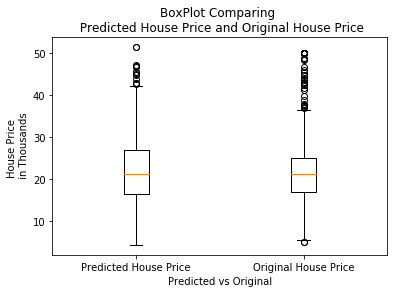

In [46]:
## Creating a Boxplot for the Predicted House Prices and the Original House Prices ##

data = [Predicted_Price.flatten(),r.flatten()] 
fig, ax = plt.subplots()
ax.boxplot(data)
plt.xticks([1, 2], ['Predicted House Price', 'Original House Price'])
plt.xlabel('Predicted vs Original')
plt.ylabel('House Price \n in Thousands')
plt.title('BoxPlot Comparing \n Predicted House Price and Original House Price')
plt.show()

In [47]:
dataframe=pd.DataFrame(Predicted_Price) 
dataframe.describe()

,0
count,506.000000
mean,22.304497
std,8.730608
min,4.311153
25%,16.410516
50%,21.250234
75%,26.896851
max,51.380337


In [48]:
## Performing Welsh t Test on Predicted Values and Original Price Values
stats.ttest_ind(Predicted_Price, r, equal_var = False)

Ttest_indResult(statistic=array([-0.40498504], dtype=float32), pvalue=array([0.6855745]))

In [49]:
print("The Median Value of the Predicted House Prices is",statistics.median(Predicted_Price))
print("The Median Value of the Original House Prices is",statistics.median(r))

The Median Value of the Predicted House Prices is [21.250233]
The Median Value of the Original House Prices is 21.2


**Results of the Third Neural Network**<br>

The third neural network predicted the House Price Median value as (21.250233) compared to the orignal datas median House Price value of (21.2). The third neural network also displayed the same shape and spread of data as is illustrated with the box plots. For further confirmation that the neural network has predicted a relatively accurate median house price value based on the neural networks inputs a Welshs t-test was performed which indicated there was not enough evidence to reject the NULL hypothesis that their is no significant statistical difference between the median values of the predicted median house price data set compared to the original data set.  

In summation we FAIL to reject the Null Hypothesis and accept that there is not enough evidence to determine there is a significant statistical difference between the median values of both data sets.

**Project Conclusion**<br>

A number of objectives where set out within this project;

1. Describe the data within the Boston House Price Data set. Descriptive statistics in conjuction with statistical graphs were used to present an overview of the descriptive statistics of the Boston House Data Set.<br>

2. Infer whether there was a price difference between the median house price of houses along and away from the Charles River. Through the use of  data preparation and statistical analysis is was determined there was a statistical difference between the price of houses along and away from the River Charles. <br>

3. Predict the median house price based off the variables contained within the Boston House Data Set using neural networks. Three neural networks were used with different activation and optimizer functions. Each neural network was used to develop the next with reducing loss' with each iteration of the neural network, culminating with a third neural network that predicted the median house price as (21.25) compared to the median house price contained within the original data set of (21.2). A Welsh's t-Test was performed on the third neural networks predicted results with the original data. The result being there is no significant statistical difference between the median values of the predicted prices and the original prices.